### Exercise 1: MMD Classifier

In [8]:
# Initialize the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

#### 1.1 Data Generation and Mean/Covariance


In [9]:
# Define the 3 distributions
num_samples = 5

mu_1 = [1, 3]
cov_1 = [[1, 0], [0, 15]]

mu_2 = [20, 31]
cov_2 = [[3, 4], [4, 11]]

mu_noise = [2, 2]
cov_noise = [[2, 0], [0, 3]]

In [10]:
# Function to generate data
def generate_sample(mu, cov, count=num_samples):
    sample = np.random.multivariate_normal(mu, cov, count)
    return sample

In [11]:
# Data Generation
data_1 = generate_sample(mu_1, cov_1)
data_2 = generate_sample(mu_2, cov_2)
data_noise = generate_sample(mu_noise, cov_noise, num_samples * 2)

# Adding Noise
data_1 += data_noise[0:num_samples]
data_2 += data_noise[num_samples:num_samples * 2]

print("Data 1: ", data_1)
print("Data 2: ", data_2)

Data 1:  [[ 3.95340659  3.4390567 ]
 [ 1.92944813 16.14402578]
 [ 1.83182392  0.52984839]
 [ 3.84105951  5.80069656]
 [ 8.35209216  1.12584255]]
Data 2:  [[18.14535637 33.1688217 ]
 [22.13941989 40.34558097]
 [20.3387749  30.97205355]
 [25.02389545 38.67981994]
 [20.10217538 31.33779531]]


In [12]:
# Hard-coding for assignment purposes

data_1 = [[-1.25737421,  5.92559082],
          [1.52062909,  8.05500375],
          [1.29638813, -0.94009448],
          [6.47232269, 15.9746529],
          [4.98939662,  5.25543094],]
data_2 = [[19.95350678, 32.01806393],
          [21.35713755, 31.68480223],
          [20.42326683, 35.99912184],
          [26.77981681, 35.81622049],
          [23.34537644, 36.63523652],]


**Mean Calculation by Hand**

$$
    \begin{align}
    \bar{x}&=\frac{\sum{x_i}}{N} \\
    \bar{x}_1&\approx\bigg[\frac{-1.3+1.5+1.3+6.4+5.0}{5}, \frac{5.9+8.0-0.94+16.0+5.3}{5}\bigg] \\
    \bar{x}_1&\approx[2.6, 7.2] \\
    \bar{x}_2&\approx\bigg[\frac{20.0+21.3+20.4+26.8+23.3}{5}, \frac{32.0+31.7+36.0+35.8+36.6}{5}] \\
    \bar{x}_2&\approx[22.4, 34.4]
    \end{align}
$$



In [13]:
# Mean Calculations
mean_1 = np.mean(data_1, axis=0)
mean_2 = np.mean(data_2, axis=0)
data = np.vstack((data_1, data_2))
mean = np.mean(data, axis=0)

print("Mean 1: ", mean_1)
print("Mean 2: ", mean_2)
print("Aggregated Mean: ", mean)

Mean 1:  [2.60427246 6.85411679]
Mean 2:  [22.37182088 34.430689  ]
Aggregated Mean:  [12.48804667 20.64240289]


**Covariance Calculation by Hand**

This is a sample calculation for the covariance of the aggregated dataset. Repeat for each class

Calculate each of the below expected values:

$$
    \begin{align}
        E(x_1) &= 12.49\\
        E(x_2) &= 20.64\\
        E(x^2_1) &= 260.27\\
        E(x^2_2) &= 633.19\\
        E(x_1 x_2) &= 399.84
    \end{align}
$$

Compute the covariance matrix (the formula taught in class is for the population covariance whereas the Python code below is for the sample covariance so they will not be exactly equal):


$$
    \begin{align}
        \Sigma &=
        \left[ 
            {\begin{array}{cc}
                E(x^2_1)-E(x_1)^2 & E(x_1 x_2)-E(x_1)E(x_2) \\
                E(x_2 x_1)-E(x_2)E(x_1) & E(x^2_2)-E(x_2)^2
            \end{array} } 
        \right] \\

        \Sigma &\approx
        \left[ 
            {\begin{array}{cc}
                104.3 & 142.0 \\
                142.0 & 207.2
            \end{array} } 
        \right] 
    \end{align}
$$

In [14]:
# Variance calculations
covariance_1 = np.cov(np.array(data_1).T)
covariance_2 = np.cov(np.array(data_2).T)
covariance = np.cov(data.T)

print("Covariance 1: ", covariance_1)
print("Covariance 2: ", covariance_2)
print("Aggregated Covariance: ", covariance)

Covariance 1:  [[ 9.6119473  10.98596509]
 [10.98596509 37.19849867]]
Covariance 2:  [[7.76323169 3.45454531]
 [3.45454531 5.65009068]]
Aggregated Covariance:  [[116.2656269  157.84056754]
 [157.84056754 230.28474393]]


#### 1.2 Eigenvalues and Eigenvectors

**Eigenvalue Calculation by Hand**

This is an example calculation for the aggregated dataset. Repeat for each class

Use the above sample covariance computed in Python for $\Sigma$. Expand the matrix in step (1) and then use quadratic formula to solve for the $\lambda$ values

$$
    \begin{align}
        0 &= \det(\Sigma - \lambda I) \\
        0 &\approx (116.3 - \lambda)(230.3-\lambda) - 157.8^2 \\
        \lambda_1 &\approx 341.09 \\
        \lambda_1 &\approx 5.45
    \end{align}
$$

In [15]:
# Eigenvalue Calculation
eigenvalue_dict = {}

def calc_eigenvalue(cov, label):

    # Coefficients for quadratic formula
    a = 1
    b = -cov[0][0]-cov[1][1]
    c = cov[0][0]*cov[1][1]-cov[1][0]**2

    # Quadratic formula
    lambda_1 = (-b+(b**2-4*a*c)**(0.5))/(2*a)
    lambda_2 = (-b-(b**2-4*a*c)**(0.5))/(2*a)

    eigenvalue_dict[label] = [lambda_1, lambda_2]

    print("Dataset: ", label)
    print("Eigenvalue 1: ", lambda_1)
    print("Eigenvalue 2: ", lambda_2)
    print()

calc_eigenvalue(covariance_1, "1")
calc_eigenvalue(covariance_2, "2")
calc_eigenvalue(covariance, "Aggregated")

Dataset:  1
Eigenvalue 1:  41.038880661407944
Eigenvalue 2:  5.771565310643805

Dataset:  2
Eigenvalue 1:  10.31917064427396
Eigenvalue 2:  3.09415173394538

Dataset:  Aggregated
Eigenvalue 1:  341.09572802738006
Eigenvalue 2:  5.45464280669529



**Eigenvector Calculation by Hand**

This is an example calculation for the aggregated dataset. Repeat for each class

Assume one of the vector components is equal to 1 as there are more variables than equations. Solve equation (2) twice - once per each $\lambda$ value

$$
    \begin{align}
        (\Sigma - \lambda I) \bar{v}_i &= 0 \\
        \left[ 
            {\begin{array}{cc}
                116.2-\lambda_i & 157.8 \\
                157.8 & 230.3-\lambda_i
            \end{array} } 
        \right] \bar{v}_i &\approx 0 \\
        \bar{v}_1 &\approx [0.70, 1] \\
        \bar{v}_2 &\approx [-1.42, 1]
        
    \end{align}
$$

In [16]:
# Eigenvectors
# Assume one of the vectors is 1

def calc_eigenvector(label):
    eigenvector_1 = [-covariance[0][1]/(covariance[0][0]-eigenvalue_dict[label][0]), 1]
    eigenvector_2 = [-covariance[0][1]/(covariance[0][0]-eigenvalue_dict[label][1]), 1]
    print("Class: ", label)
    print("Eigenvector 1: ", eigenvector_1)
    print("Eigenvector 2: ", eigenvector_2)
    print() 

calc_eigenvector("1")
calc_eigenvector("2")
calc_eigenvector("Aggregated")

Class:  1
Eigenvector 1:  [-2.0981974552770506, 1]
Eigenvector 2:  [-1.4284981949199644, 1]

Class:  2
Eigenvector 1:  [-1.4898145073252358, 1]
Eigenvector 2:  [-1.3947027490658275, 1]

Class:  Aggregated
Eigenvector 1:  [0.7020437510299167, 1]
Eigenvector 2:  [-1.424412650255734, 1]



**Inverse Covariance Matrix by Hand**

If this were to be done with the method taught in class, then solve the below, where $\Delta$ is the matrix of eigenvalues, $\lambda$ and $\phi$ is the normalized eigenvectors, $\bar{v}$

$$\Sigma^{-1} = \phi^T \Delta^{-1} \phi$$

First, normalize the eigenvectors. For each eigenvector, calculate the norm and divide it into the eigenvector:

$$
\begin{align}
    \hat{v} &= \frac{v}{||v||} \\ \\

    \hat{v}_{11} &\approx \frac{1}{\sqrt{2.1^2 + 1^2}} \cdot [-2.1, 1] \\
    \hat{v}_{11} &\approx [-0.901, 0.429] \\ \\

    \hat{v}_{12} &\approx \frac{1}{\sqrt{1.43^2 + 1^2}} \cdot [-1.43, 1] \\
    \hat{v}_{12} &\approx [0.819, 0.573] \\ \\

    \hat{v}_{21} &\approx [0.574, 0.820] \\
    \hat{v}_{22} &\approx [0.816, 0.575]
\end{align}
$$

Next, compute the inverse covariance matrix for each class:

$$
\begin{align}
    \Sigma^{-1} &= \phi^T \Delta^{-1} \phi \\

    \Sigma^{-1}_1 &\approx         
        \left[ 
            {\begin{array}{cc}
                0.05166 & 0.02461 \\
                0.02461 & 0.07323
            \end{array} } 
        \right] \\

    \Sigma^{-1}_2 &\approx         
    \left[ 
        {\begin{array}{cc}
            0.24952 & 0.19797 \\
            0.19797 & 0.17151
        \end{array} } 
    \right]
\end{align}
$$

Alternatively, since it's just a $2\times 2$ matrix, we can just directly invert it to validate the method taught in class

$$
    \left[
        {\begin{array}{cc}
            a & b \\ c & d
        \end{array} } 
    \right]^{-1}  = \frac{1}{ad-bc}
    \left[ 
        {\begin{array}{cc}
            d & -b \\ -c & a
        \end{array} } 
    \right] 
$$

The inverted covariance matrices for each class are:

$$
\begin{align}
\Sigma_1 &\approx
    \left[ 
        {\begin{array}{cc}
            9.6 & 11.0 \\ 11.0 & 37.2
        \end{array} } 
    \right]^{-1}  = 
    \left[ 
        {\begin{array}{cc}
            0.16 & -0.05 \\ -0.05 & 0.04
        \end{array} } 
    \right] \\

\Sigma_2 &\approx
    \left[ 
        {\begin{array}{cc}
            7.8 & 3.4 \\ 3.4 & 5.7
        \end{array} } 
    \right]^{-1}  = 
    \left[ 
        {\begin{array}{cc}
            0.17 & -0.10 \\ -0.10 & 0.24
        \end{array} } 
    \right] 
\end{align}

$$

In [17]:
def invert_covariance(cov, label):
    inv_cov = 1/(cov[0][0]*cov[1][1]-cov[0][1]*cov[1][0]) * \
        np.array([[cov[1][1], -cov[0][1]], [-cov[1][0], cov[0][0]]])
    print("Inverse Covariance for: ", label)
    print(inv_cov)
    print()
    return inv_cov

inv_cov_1 = invert_covariance(covariance_1, "1")
inv_cov_2 = invert_covariance(covariance_2, "2")
inv_cov = invert_covariance(covariance, "Aggregated")

Inverse Covariance for:  1
[[ 0.1570494  -0.04638196]
 [-0.04638196  0.04058095]]

Inverse Covariance for:  2
[[ 0.17695752 -0.10819433]
 [-0.10819433  0.24313985]]

Inverse Covariance for:  Aggregated
[[ 0.12377205 -0.08483519]
 [-0.08483519  0.06248974]]



#### 1.3 MMD Classifier Decision Boundary (N=5)

**Calculation**

Evaluate the below to find an expression for $x$

$$
\begin{align}
    x^T (\Sigma^{-1}_1 - \Sigma^{-1}_2)x+2(\mu^T_2 \Sigma^{-1}_2-\mu^T_1 \Sigma^{-1}_1)x+\mu^T_1 \Sigma^{-1}_1 \mu_1 -\mu^T_2 \Sigma^{-1}_2 \mu_2 &= 0 \\

    -0.0199 x_1^2 - 0.2026 x_2^2 + 0.1236 x_1 x_2 + 0.2851 x_1 + 11.5872 x_2 + 180.3700 &= 0

\end{align}
$$

In [18]:
def mmd_classifier(m1, m2, icov1, icov2):
    # First term
    a = icov1 - icov2

    # Second term
    mu_sigma_2 = np.array([m2[0] * icov2[0][0] + m2[1] * icov2[0][1], m2[0] * icov2[1][0] + m2[1] * icov2[1][1]])
    mu_sigma_1 = np.array([m1[0] * icov1[0][0] + m1[1] * icov1[0][1], m1[0] * icov1[1][0] + m1[1] * icov1[1][1]])
    b = 2 * (mu_sigma_2 - mu_sigma_1)

    # Third Term
    c = (mu_sigma_1[0] * m1[0] + mu_sigma_1[1] * m1[1]) - (mu_sigma_2[0] * m2[0] + mu_sigma_2[1] * m2[1])

    # Standard form coefficients: 0 = Ax^2 + By^2 + Cxy + Dx + Ey + F
    x_1_squared = a[0][0]
    x_2_squared = a[1][1]
    x_1_x_2 = a[0][1] + a[1][0]
    x_1 = b[0]
    x_2 = b[1]

    print(f"0 = {x_1_squared} x_1^2 + {x_2_squared} x_2^2 + {x_1_x_2} x_1 * x_2 + {x_1} x_1 + {x_2} x_2 + {c}")

    return [x_1_squared, x_2_squared, x_1_x_2, x_1, x_2, c]

coef = mmd_classifier(mean_1, mean_2, inv_cov_1, inv_cov_2)

0 = -0.019908114037862218 x_1^2 + -0.2025588964265756 x_2^2 + 0.12362473604038675 x_1 * x_2 + 0.28512913491843783 x_1 + 11.587226274486085 x_2 + -208.80750893862438


C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\1839172264.py:11: RuntimeWarning: invalid value encountered in sqrt
  y_1 = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\1839172264.py:12: RuntimeWarning: invalid value encountered in sqrt
  y_2 = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])


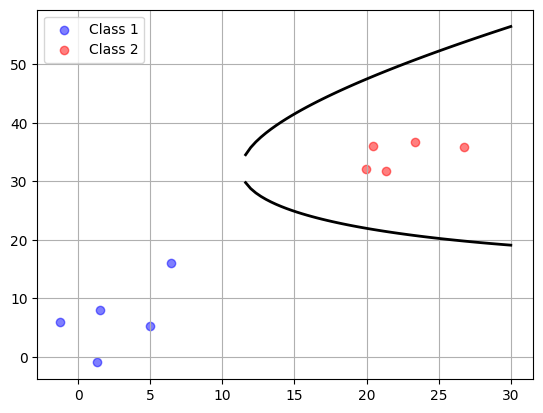

In [19]:
# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the data
ax1.scatter(np.array(data_1)[:, 0], np.array(data_1)[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(np.array(data_2)[:, 0], np.array(data_2)[:, 1], c='r', alpha=0.5, label='Class 2')

# Plot the decision boundary
x = np.linspace(-5, 30, 100)
y_1 = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
y_2 = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
ax1.plot(x, y_1, linewidth=2.0, color='black')
ax1.plot(x, y_2, linewidth=2.0, color='black')

# Display plot
plt.grid()
plt.legend()
plt.show()

#### 1.4 MMD Classifier Decision Boundary (N=100)

In [20]:
# Data Generation
bdata_1 = generate_sample(mu_1, cov_1, 100)
bdata_2 = generate_sample(mu_2, cov_2, 100)
bdata_noise = generate_sample(mu_noise, cov_noise, 200)

# Adding Noise
bdata_1 += bdata_noise[0:100]
bdata_2 += bdata_noise[100:200]

# Mean
bmean_1 = np.mean(bdata_1, axis=0)
bmean_2 = np.mean(bdata_2, axis=0)

# Covariance
bcovariance_1 = np.cov(np.array(bdata_1).T)
bcovariance_2 = np.cov(np.array(bdata_2).T)

# Inverse Covariance
binv_cov_1 = invert_covariance(bcovariance_1, "1")
binv_cov_2 = invert_covariance(bcovariance_2, "2")

bcoef = mmd_classifier(bmean_1, bmean_2, binv_cov_1, binv_cov_2)

Inverse Covariance for:  1
[[ 0.3279904  -0.00293465]
 [-0.00293465  0.04843726]]

Inverse Covariance for:  2
[[ 0.25248906 -0.04428525]
 [-0.04428525  0.08308765]]

0 = 0.07550134057744334 x_1^2 + -0.03465038448348604 x_2^2 + 0.08270120202015176 x_1 * x_2 + 6.3095698573926615 x_1 + 3.022466288992444 x_2 + -146.8478326951204


C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\619209248.py:11: RuntimeWarning: invalid value encountered in sqrt
  y_1 = (-bcoef[2]*x-bcoef[4]+((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\619209248.py:12: RuntimeWarning: invalid value encountered in sqrt
  y_2 = (-bcoef[2]*x-bcoef[4]-((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])


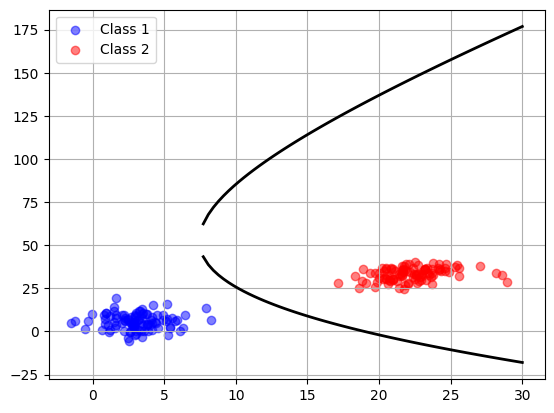

In [21]:
# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the data
ax1.scatter(np.array(bdata_1)[:, 0], np.array(bdata_1)[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(np.array(bdata_2)[:, 0], np.array(bdata_2)[:, 1], c='r', alpha=0.5, label='Class 2')

# Plot the decision boundary
x = np.linspace(-5, 30, 100)
y_1 = (-bcoef[2]*x-bcoef[4]+((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
y_2 = (-bcoef[2]*x-bcoef[4]-((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
ax1.plot(x, y_1, linewidth=2.0, color='black')
ax1.plot(x, y_2, linewidth=2.0, color='black')

# Display plot
plt.grid()
plt.legend()
plt.show()

#### 1.5 MMD Accuracy Calculation

In [22]:
# Data generation
cdata_1 = generate_sample(mu_1, cov_1, 50)
cdata_2 = generate_sample(mu_2, cov_2, 50)
cdata_noise = generate_sample(mu_noise, cov_noise, 100)
cdata_noise_2 = generate_sample([0,0], [[1,0],[0,1]], 100)

# Adding noise
cdata_1 += cdata_noise[0:50] + cdata_noise_2[0:50]
cdata_2 += cdata_noise[50:100] + cdata_noise_2[50:100]

In [23]:
# Classifies a single data point as class '1' or '2'
def classifier(x, y, coef):
    lowerbound = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
    upperbound = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
    return 2 if y <= upperbound and y >= lowerbound else 1

In [24]:
# Returns accuracy measures for both classes
def compute_accuracy(coef, class_1, class_2):
    accuracy_1 = 1-(sum([classifier(i[0], i[1], coef) for i in class_1])-50)/50
    accuracy_2 = 1-(100-sum([classifier(i[0], i[1], coef) for i in class_2]))/50

    print("Accuracy for class 1: ", accuracy_1)
    print("Accuracy for class 2: ", accuracy_2)
    print("Total Accuracy: ", (accuracy_1 + accuracy_2) / 2)

In [25]:
print("Accuracy for smaller training set")
compute_accuracy(coef, cdata_1, cdata_2)
print()

print("Accuracy for larger training set")
compute_accuracy(bcoef, cdata_1, cdata_2)

Accuracy for smaller training set
Accuracy for class 1:  1.0
Accuracy for class 2:  0.98
Total Accuracy:  0.99

Accuracy for larger training set
Accuracy for class 1:  1.0
Accuracy for class 2:  1.0
Total Accuracy:  1.0


C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\4018339649.py:3: RuntimeWarning: invalid value encountered in scalar power
  lowerbound = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\4018339649.py:4: RuntimeWarning: invalid value encountered in scalar power
  upperbound = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])


C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\361830486.py:13: RuntimeWarning: invalid value encountered in sqrt
  y_1 = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\361830486.py:14: RuntimeWarning: invalid value encountered in sqrt
  y_2 = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\361830486.py:18: RuntimeWarning: invalid value encountered in sqrt
  y_3 = (-bcoef[2]*x-bcoef[4]+((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
C:\Users\ephei\AppData\Local\Temp\ipykernel_8688\361830486.py:19: RuntimeWarning: invalid value encountered in sqrt
  y_4 = (-bcoef[2]*x-bcoef[4]-((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])


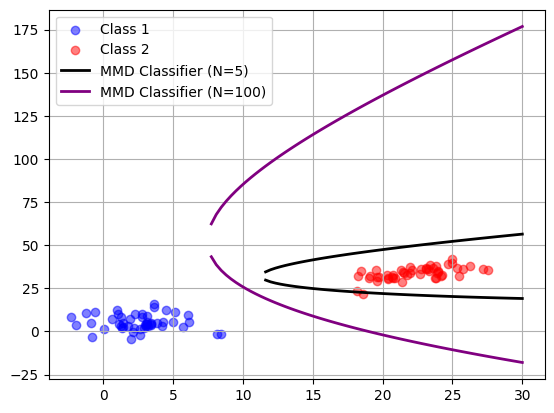

In [26]:
# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the data
ax1.scatter(np.array(cdata_1)[:, 0], np.array(cdata_1)[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(np.array(cdata_2)[:, 0], np.array(cdata_2)[:, 1], c='r', alpha=0.5, label='Class 2')

# Plot the decision boundary
x = np.linspace(-5, 30, 100)

# Decision boundaries of MMD classifier trained on smaller dataset
y_1 = (-coef[2]*x-coef[4]+((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
y_2 = (-coef[2]*x-coef[4]-((coef[2]*x+coef[4])**2-4*coef[1]*(coef[0]*x**2+coef[3]*x+coef[5]))**(1/2))/(2*coef[1])
ax1.plot(x, y_1, linewidth=2.0, color='black', label="MMD Classifier (N=5)")
ax1.plot(x, y_2, linewidth=2.0, color='black')

y_3 = (-bcoef[2]*x-bcoef[4]+((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
y_4 = (-bcoef[2]*x-bcoef[4]-((bcoef[2]*x+bcoef[4])**2-4*bcoef[1]*(bcoef[0]*x**2+bcoef[3]*x+bcoef[5]))**(1/2))/(2*bcoef[1])
ax1.plot(x, y_3, linewidth=2.0, color='purple', label="MMD Classifier (N=100)")
ax1.plot(x, y_4, linewidth=2.0, color='purple')


# Display plot
plt.grid()
plt.legend()
plt.show()

#### 1.6 Classifier Comparison

Both classifiers scored 100% accuracy so they are difficult to compare quantiatively. However, by visually inspecting the plots of the decision boundaries, the classifier trained on the 100 datapoints is better because it is situated near the half-way point between the 2 datasets whereas the N=5 classifier is very close to the class 2 cluster, which risks misclassifying anomolies in the class 2 dataset

In general, the more (high-quality) data, the better for training classifiers so it would make sense for the larger dataset to better capture the true distribution and produce a better classifier

#### 1.7 MED Classifier

In [27]:
# Compute the decision boundary

# Mean
cmean_1 = np.mean(cdata_1, axis=0)
cmean_2 = np.mean(cdata_2, axis=0)

# Coefficients of standard form Ax2 + Bx1 + C = 0
A = -cmean_1[0]+cmean_2[0]
B = -cmean_1[1]+cmean_2[1]
C = 0.5*(cmean_1[0]**2+cmean_1[1]**2)-0.5*(cmean_2[0]**2+cmean_2[1]**2)

# Decision boundary
print("x2=(-A/B)x1-(C/B): ", -(A/B), "x1 + ", -(C/B))

x2=(-A/B)x1-(C/B):  -0.6907789880085397 x1 +  28.113595487300966


In [28]:
# Compute Accuracy
def med_accuracy(x, y):
    return 2 if y > -(A/B)*x-C/B else 1

accuracy_1 = 1-(sum([med_accuracy(i[0], i[1]) for i in cdata_1])-50)/50
accuracy_2 = 1-(100-sum([med_accuracy(i[0], i[1]) for i in cdata_2]))/50

print("Accuracy for class 1: ", accuracy_1)
print("Accuracy for class 2: ", accuracy_2)
print("Total accuracy: ", (accuracy_1+accuracy_2)/2)


Accuracy for class 1:  1.0
Accuracy for class 2:  1.0
Total accuracy:  1.0


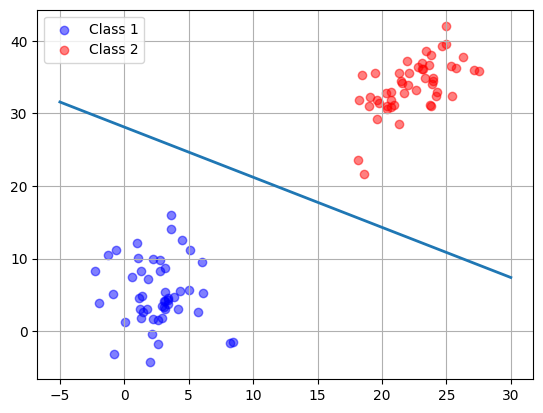

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the data
ax1.scatter(cdata_1[:, 0], cdata_1[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(cdata_2[:, 0], cdata_2[:, 1], c='r', alpha=0.5, label='Class 2')

# Plot the decision boundary
x = np.linspace(-5, 30, 100)
y = -(A/B)*x-C/B
ax1.plot(x, y, linewidth=2.0)

# Display plot
plt.grid()
plt.legend()
plt.show()

**Analysis:**

Both classifiers scored 100% on the test set but this is because of how separated the datasets are. However, the MMD classifier is theoretically better as it has a scaling factor to account for situations where one axis' scale may bias the classifier due to its relatively high value (for example, height in nanometers vs age in years). In this case, the covariance matrix reveals a higher variation in the $x^2$ axis for both classes - the MMD classifier would technically be the better classifier as it accounts for this. However, the data is also very linearly separated so the MED is also a strong candidate for classification

#### 2.1 ML Classifier

In [30]:
# Insert a given point into the multivariate normal distribution, trained on each of the distribution's parameters
def ml_normal_classifier(x, y):
    x_mu_1 = np.array([x-bmean_1[0], y-bmean_1[1]])
    x_mu_2 = np.array([x-bmean_2[0], y-bmean_2[1]])
    class_1_p = 1/((2*np.pi)**(1/2)*(bcovariance_1[0][0]*bcovariance_1[1][1]-bcovariance_1[0][1]*bcovariance_1[1][0])**(1/2))*np.exp(-0.5*((x_mu_1[0]*binv_cov_1[0][0]+x_mu_1[1]*binv_cov_1[1][0])*x_mu_1[0]+x_mu_1[1]*(x_mu_1[0]*binv_cov_1[0][1]+x_mu_1[1]*binv_cov_1[1][1])))
    class_2_p = 1/((2*np.pi)**(1/2)*(bcovariance_2[0][0]*bcovariance_2[1][1]-bcovariance_2[0][1]*bcovariance_2[1][0])**(1/2))*np.exp(-0.5*((x_mu_2[0]*binv_cov_2[0][0]+x_mu_2[1]*binv_cov_2[1][0])*x_mu_2[0]+x_mu_2[1]*(x_mu_2[0]*binv_cov_2[0][1]+x_mu_2[1]*binv_cov_2[1][1])))
    return 1 if class_1_p >= class_2_p else 2

In [31]:
# Accuracy
accuracy_1 = 1-(sum([ml_normal_classifier(i[0], i[1]) for i in cdata_1])-50)/50
accuracy_2 = 1-(100-sum([ml_normal_classifier(i[0], i[1]) for i in cdata_2]))/50

print("Accuracy for class 1: ", accuracy_1)
print("Accuracy for class 2: ", accuracy_2)
print("Total accuracy: ", (accuracy_1+accuracy_2)/2)

Accuracy for class 1:  1.0
Accuracy for class 2:  1.0
Total accuracy:  1.0


#### 2.2 MAP Classifier

In [32]:
# Insert a given point into the multivariate normal distribution, trained on each of the distribution's parameters
def map_normal_classifier(x, y):
    x_mu_1 = np.array([x-bmean_1[0], y-bmean_1[1]])
    x_mu_2 = np.array([x-bmean_2[0], y-bmean_2[1]])
    class_1_p = 1/((2*np.pi)**(1/2)*(bcovariance_1[0][0]*bcovariance_1[1][1]-bcovariance_1[0][1]*bcovariance_1[1][0])**(1/2))*np.exp(-0.5*((x_mu_1[0]*binv_cov_1[0][0]+x_mu_1[1]*binv_cov_1[1][0])*x_mu_1[0]+x_mu_1[1]*(x_mu_1[0]*binv_cov_1[0][1]+x_mu_1[1]*binv_cov_1[1][1])))
    class_2_p = 1/((2*np.pi)**(1/2)*(bcovariance_2[0][0]*bcovariance_2[1][1]-bcovariance_2[0][1]*bcovariance_2[1][0])**(1/2))*np.exp(-0.5*((x_mu_2[0]*binv_cov_2[0][0]+x_mu_2[1]*binv_cov_2[1][0])*x_mu_2[0]+x_mu_2[1]*(x_mu_2[0]*binv_cov_2[0][1]+x_mu_2[1]*binv_cov_2[1][1])))
    return 1 if 0.58*class_1_p >= 0.42*class_2_p else 2

In [33]:
# Accuracy
accuracy_1 = 1-(sum([map_normal_classifier(i[0], i[1]) for i in cdata_1])-50)/50
accuracy_2 = 1-(100-sum([map_normal_classifier(i[0], i[1]) for i in cdata_2]))/50

print("Accuracy for class 1: ", accuracy_1)
print("Accuracy for class 2: ", accuracy_2)
print("Total accuracy: ", (accuracy_1+accuracy_2)/2)

Accuracy for class 1:  1.0
Accuracy for class 2:  1.0
Total accuracy:  1.0


#### 2.3 ML v MAP Classifier Analysis

The accuracy measures for both classifiers is 100% which implies the normal distribution assumption is correct. However, examine the scatterplot of the data and the true distribution statistics to find that the datasets are separated by a large distance. Even with relatively large variances, the 2 classes are still easily distinguishable at a glance which makes it easy to classify with a high accuracy.

Removing the initial noise and retraining the dataset will not have a significant impact on accuracy due to the small effect of the noise (low mean and variance). However, if the noise was more prevalent, then removing it would improve the classifiers as the sample data would be more densely clustered which makes it easier to separate and classify. This is because the classifiers naturally bias toward the dataset with the lower covariances

#### 2.4 ML v MAP v MMD v MED Classifier Comparison

All 4 classifiers scored 100% accuracy due to the convenient structure of the dataset where each class was distanced far enough from each other that is virtually no chance of any overlap - making the data easy to accurately classify

However, each classifier may benefit from different environments:

* **MED**: For linearly separated data
* **MMD**: For quadratic relationships and where the axis may be scaled in a bias way (ex. high variance in one dimension like in this dataset)
* **ML**: When the distribution is not known and there is a lot of data which can be used to estimate distribution parameters
* **MAP**: When the distribution is not known but prior probabilities of each classes are known